We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions in minutes.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



# Aim: 

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the distance of error between the predicted points and the actual points in the dataset.

We would like to predict the yearly amount spent by a customer with respect to each of our quantitative features.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [33]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [34]:
# There is no missing data in our dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [58]:
# The avg of time spent on app is 12 mins while on website is 37 mins.
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis.

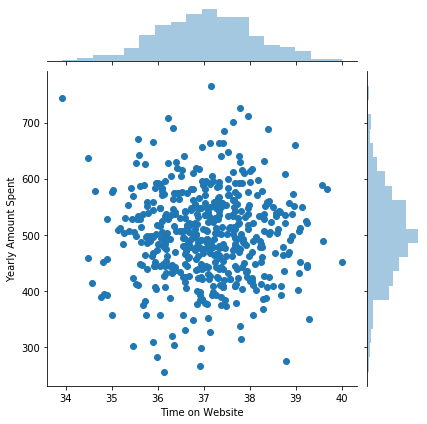

In [36]:
# As u can see there is no direct or inverse proportion between the 2 features.
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=customers,kind='scatter')

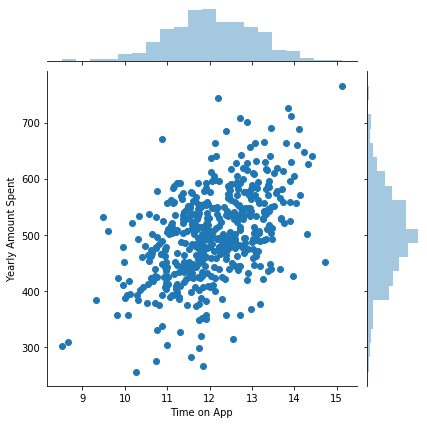

In [37]:
# As u can see there is almost a direct proportion between these 2 features as when 1 of them inc. the other does too.
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=customers,kind='scatter')

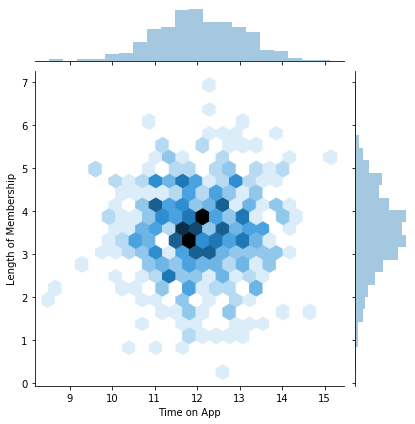

In [38]:
# As u can see most of the members spent time on app for 12 mins and has almost 4 years of membership.
sns.jointplot(x='Time on App', y='Length of Membership',data=customers,kind='hex')

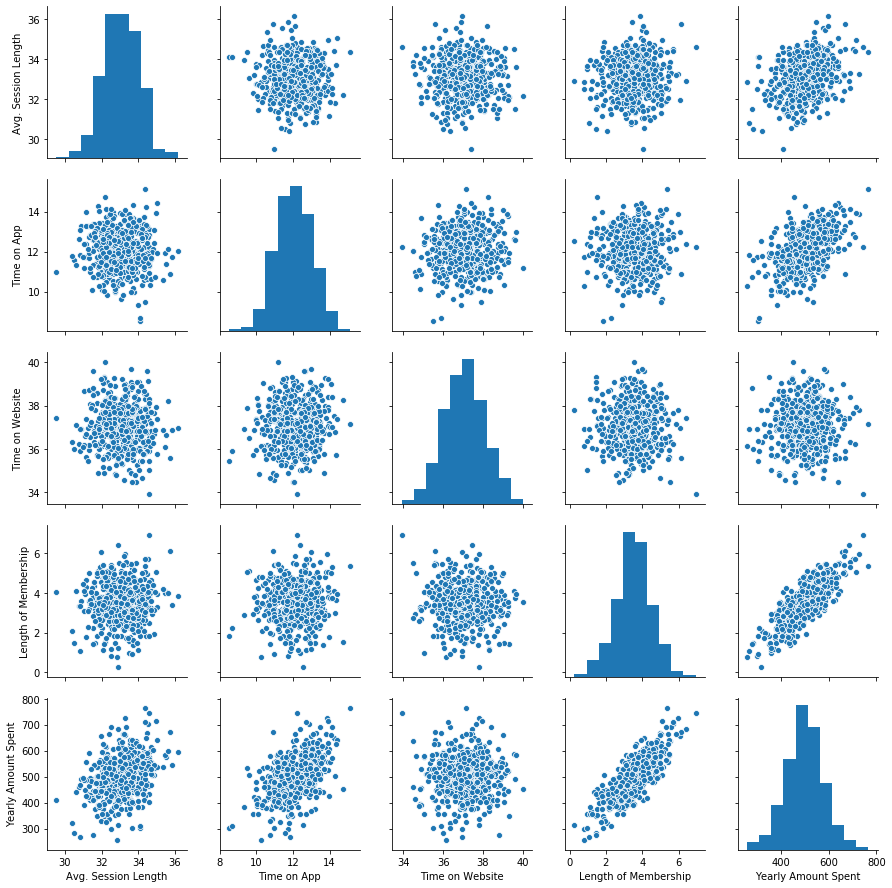

In [39]:
# Notice the most 2 correlated features where the yearly amount spent and the length of the membership.
sns.pairplot(customers)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

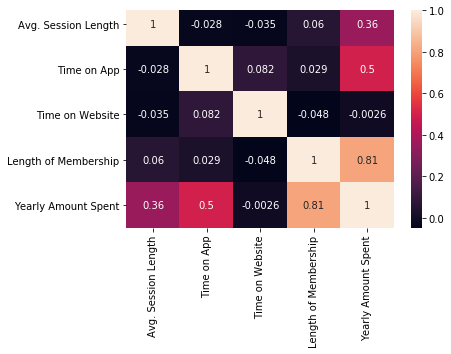

In [40]:
# We can also assure that by using heatmap.
# Notice the highest score of correlation is between yearly amount spent and length of membership.
ax = sns.heatmap(customers.corr(),annot=True)
ax.set_ylim(5, 0.2)
plt.tight_layout


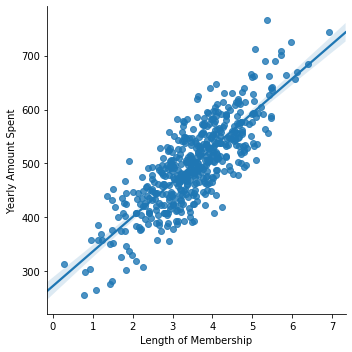

In [59]:
# As u can see the shadow around the line is very shallow which means the amount of error is very low.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

# Linear Regression Model.

In [42]:
# Numerical features to train our model on.
X = customers[["Avg. Session Length" , "Time on App", "Time on Website", "Length of Membership"]]

# Target feature to predict.
y = customers['Yearly Amount Spent']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Train test split of size 70, 30.
# Use random state to get exactly the same way of split every single time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
# Training our model on the training data(70%) with the answers given into it.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# This means that if all features are constant but the first feature.
# 1 unit increase in Avg. Session Length would increase the Yearly amount spent by 25.981550$.
coeff_df = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [49]:
# Predicting on our test data(30%) given the new sample points in the test without the answers.
predictions = lm.predict(X_test)

In [50]:
# Check for prediction errors in the test set 30% of our dataset.
predictions - y_test

18      4.126186
361     1.686918
104    -0.816457
4      -7.975058
156     3.858503
350    13.343191
32    -11.115226
205     3.047954
81     10.891708
414    13.196331
489    10.480079
474     7.828233
95      9.594614
355     5.836994
65      0.007446
39      7.993542
368   -15.675494
236     5.395897
318     8.314363
435     1.991658
12    -11.190454
211     6.579981
289    -9.229167
243    -7.931443
241   -12.205438
382     2.406517
457    -2.514211
320     8.999863
64     -5.242435
335     4.358849
         ...    
143    -7.685870
271     6.392186
56      2.570519
475    -2.538476
272    -7.892440
433     1.430354
154     4.122048
200   -17.630258
53      6.206387
385    10.324534
312    11.888442
51      1.037332
468     9.478116
345     4.356683
233    -0.227604
237     4.957554
317     7.063427
450    -1.534530
324    14.118410
170    -4.412485
266   -10.501595
133     5.099357
430    -8.556595
15    -10.790168
13    -11.906904
147    -1.431172
346    -3.977230
423    -3.5212

Text(0, 0.5, 'Predicted Values')

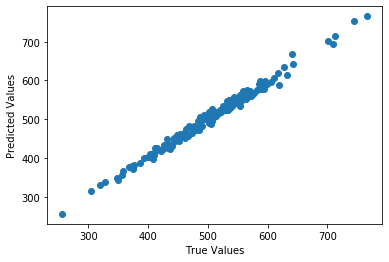

In [51]:
# Plotting our actual answers vs our predictions we made on the test samples.
# if it is a straight line this means that our predictions and the true values has the same values 
#but we can see there is a bit of an error here
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [52]:
from sklearn import metrics

In [53]:
# Checking our error in prediction using 3 different types of error checkers.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343082
MSE: 79.81305165097419
RMSE: 8.93381506697862


In [54]:
# This means that our model explains 99% of the variance data in our test set which is pretty awesome!
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

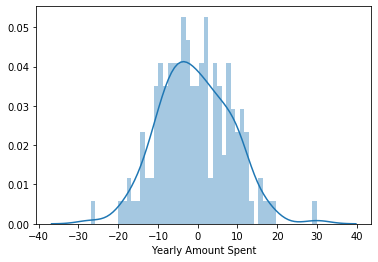

In [55]:
# Since the errors are normally distributed this means that our model did well.
sns.distplot((y_test - predictions), bins=50)

# Conclusion:
 We could say that 1 extra minute spent on the application would increase the yearly amount of dollars paid in year by 38.5$
 if all other features is held constant.
 And if the cost spent on creating an app and a website is the same this means that the company should definetly 
 spend more time on creating their app and ignore the website.

In [56]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# As u can notice the predicted values are almost the same as the actual values with just a little bit of an error.

Text(0.5, 1.0, 'Predicted yearly amount spent with respect to Time_on_App')

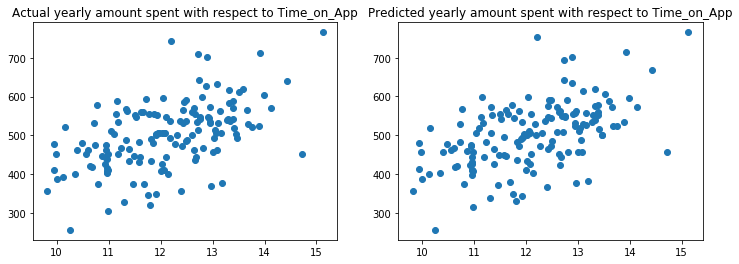

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_test['Time on App'], y_test)
axes[0].set_title("Actual yearly amount spent with respect to Time_on_App")

axes[1].scatter(X_test['Time on App'], predictions)
axes[1].set_title("Predicted yearly amount spent with respect to Time_on_App")